# Qiskit Assignment 4
## Deutsch-Jozsa 

### Learning Objectives
1. Implement a balanced Deustch-Jozsa oracle
2. Analyze an oracle
3. Run the algorithm on a quantum computer

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [1]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import pprint

#### Task 1 - Balanced Oracle (30 pts)
Return a Deutsch-Jozsa circuit as described in class from the following method such that
- the output has `6` bits
- the oracle is characterized by a balanced function
- all amplitude in the resulting state is placed on the $|010010\rangle$ term

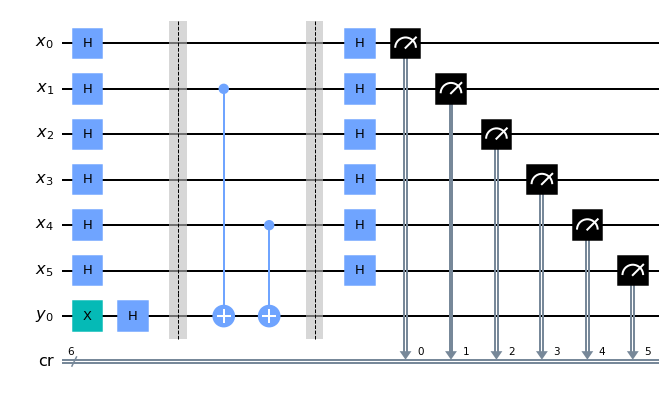

In [2]:
def dj_balanced():
    n = 6
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
        
    qc.barrier()
    
    qc.cx(1,n)
    qc.cx(4,n)
        
    qc.barrier()

    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    
    # END SOLUTION
    
    return qc.reverse_bits()
    
dj_balanced().reverse_bits().draw(output='mpl')   

In [3]:
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(dj_balanced(), qasm_sim)
counts = job.result().get_counts()
print("State    Probability")
print("--------------------")
for state, count in sorted(counts.items(), key=lambda tup: tup[1], reverse=True):
    print("|"+state+">", str(count/1024*100)+"%")

State    Probability
--------------------
|010010> 100.0%


In [4]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED 6 BIT OUTPUT
""" # END TEST CONFIG

def test_num_bits2():
    n = 6
    djbal = dj_balanced()
    return djbal.num_clbits == n and djbal.num_qubits == n+1
    
test_num_bits2()

True

In [5]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED AMPLITUDE OF OUTPUT STATE TO BE 1 on |010011>
""" # END TEST CONFIG

def test_balanced_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_balanced(), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and '010010' in counts and counts['010010'] == 1024
    
test_balanced_output()

True

In [6]:
""" # BEGIN TEST CONFIG
hidden: false
points: 28
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG
def test_num_bits2():
    n = 6
    djbal = dj_balanced()
    return djbal.num_clbits == n and djbal.num_qubits == n+1

def test_balanced_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_balanced(), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and '010010' in counts and counts['010010'] == 1024

def award_credit2():
    return test_num_bits2() and test_balanced_output()

award_credit2()

True

#### Task 2 - A New Oracle
For tasks 2A-2D, we've provided you with a function`an_oracle` that returns a [multi-controlled X gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate) oracle for a given $n$. The multi-controlled X gate is controlled on the first $n-1$ qubits of the circuit.

#### Task 2A - Examining $f(x)$ (10 pts)

Running the following cells shows the oracle generated for the case of $n=3$. 

In [2]:
def an_oracle(qc, n):
    qc.barrier()
    if n > 1:
        qc.mcx([i for i in range(n-1)],n)
    elif n == 1:
        qc.x(n)
    qc.barrier()
    return qc

def display_harness(n):
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))
    qc = an_oracle(qc, n)
    return qc

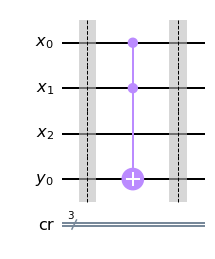

In [8]:
display_harness(3).draw(output='mpl')

We wish to characterize this oracle to determine whether it keeps its promise. As seen in lecture, one way to do this is to write out a table of $f(x)$ for all combinations of inputs.

| x_0 | x_1 | x_2 | y | f(x) |
|-----|-----|-----|---|------|
| 0   | 0   | 0   | 0 |      |
| 0   | 0   | 0   | 1 |      |
| 0   | 0   | 1   | 0 |      |
| 0   | 0   | 1   | 1 |      |
| 0   | 1   | 0   | 0 |      |
| 0   | 1   | 0   | 1 |      |
| 0   | 1   | 1   | 0 |      |
| 0   | 1   | 1   | 1 |      |
| 1   | 0   | 0   | 0 |      |
| 1   | 0   | 0   | 1 |      |
| 1   | 0   | 1   | 0 |      |
| 1   | 0   | 1   | 1 |      |
| 1   | 1   | 0   | 0 |      |
| 1   | 1   | 0   | 1 |      |
| 1   | 1   | 1   | 0 |      |
| 1   | 1   | 1   | 1 |      |

Refer back to the 02 Reversible Computations lecture for a refresher on the [Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate). 

- Double click on this cell to edit it and fill in the $f(x)$ column
- For what percentage of inputs does $f(x) = 1$?

25%. Only rows where $x_0$ and $x_1$ are both 1 make $f(x)=1$. (INSTRUCTOR NOTE: I'm not filling in the solution in the table because otter doesn't have an easy way to sanatize that in generating the student version. From top down, the column should read 0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.)

#### Task 2B - Oracle Characterization (25 pts)

- For $n=3$, characterize the oracle as a **constant** or **balanced** function or **neither**. Be sure to explain how you can tell.
- If the oracle is a **balanced** function or **neither**, also explain how you can add a single gate to turn the oracle into a **constant** function

---

For $n=3$, the oracle does not keep its promise and hence it is **neither** a constant or balanced function. We can see this because a constant function would have all rows of the table from 3A be the same and a balanced function would have half zeros and half ones. Since 4/16=25% are ones, it's neither constant or balanced.

You can add another multi-controlled X gate to turn the oracle into a constant since MCX is its own inverse and the result will be a $f(x)=0$ oracle.

#### Task 2C - Oracle Analysis  (25 pts)

Consider the oracle returned by `an_oracle` for inputs of $n\geq 1$.

- For which value(s) of $n$ does `an_oracle` return a valid, **constant** Deutsch-Jozsa oracle?
    - What is the constant value of $f(x)$?

- For which value(s) of $n$ does `an_oracle` return a valid, **balanced** Deutsch-Jozsa oracle?
    - What state has 100% of the amplitude on it?

- For which value(s) of $n$ does `an_oracle` **not** return a valid Deutsch-Jozsa oracle?


---

This is a valid, constant DJ oracle for $n=1$. Since the bottom qubit has an X gate not controlled by any $x$ qubits, the oracle represents $f(x)=1$.

This is a valid, balanced DJ oracle for $n=2$. All of the amplitude is on the $|10\rangle$ term. This is a balanced parity function like in Task 2; the MCX effectively acts as a single CX on the first qubit).

For $n\geq 3$, `an_oracle` does not return a valid Deutsch-Jozsa oracle.

#### Task 2D - Run on IBM (10 pts)

- Fill in the `dj_harness` function below with complete Deutsch-Jozsa circuitry around the oracle
- Run the completed `dj_harness` circuit on an IBM machine over `1024` trials with `n=3`
- Store the result in `counts` and observe the resulting histogram

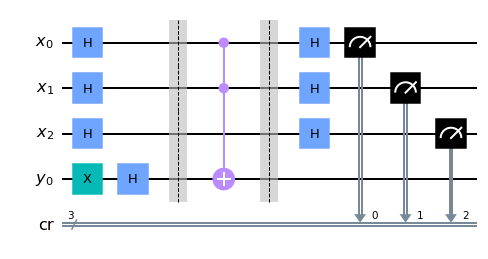

In [9]:
def dj_harness(n):
    
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    # END SOLUTION
    
    qc = an_oracle(qc, n)
    
    # BEGIN SOLUTION
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
        
    # END SOLUTION
    
    return qc.reverse_bits()
    
    
dj_harness(3).reverse_bits().draw(output='mpl')

Check job status here: https://quantum-computing.ibm.com/jobs/624672e6103a8e51e949fe90


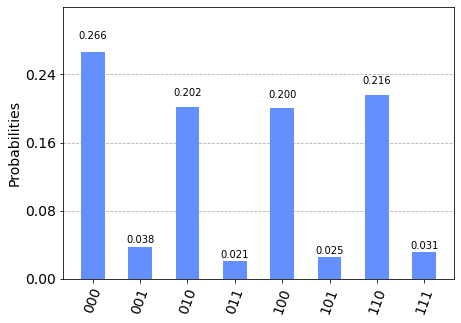

In [10]:
# run your IBM job in this cell
IBMQ.load_account()

# BEGIN SOLUTION
ibmqc = IBMQ.get_provider(hub='ibm-q').get_backend('ibmq__')
job = execute(dj_harness(3), ibmqc, shots=1024)
print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())
res = job.result()
counts = res.get_counts()
# END SOLUTION

plot_histogram(counts)